# Heart Disease Classification

### Set up working Environment
Import Relevant Libraries


In [102]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import autoreload
import missingno as msno
import warnings
import os
import sys
import csv

from collections import defaultdict, Counter

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


sb.set_style("dark")
sb.set()

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)

%matplotlib inline
%reload_ext autoreload
%autoreload 2

### Load Dataset from Local Host Machine

In [55]:
df = pd.read_csv("D:\Open Classroom\Datasets\Heart Failure Prediction Dataset\heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### Perform Statistical Analysis on the Dataframe

In [56]:
df.shape

(918, 12)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [58]:
df.describe(include = "all").round()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.0,918,918,918.0,918.0,918.0,918,918.0,918,918.0,918,918.0
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,54.0,NaN,NaN,132.0,199.0,0.0,NaN,137.0,NaN,1.0,NaN,1.0
std,9.0,NaN,NaN,19.0,109.0,0.0,NaN,25.0,NaN,1.0,NaN,0.0
min,28.0,NaN,NaN,0.0,0.0,0.0,NaN,60.0,NaN,-3.0,NaN,0.0
25%,47.0,NaN,NaN,120.0,173.0,0.0,NaN,120.0,NaN,0.0,NaN,0.0
50%,54.0,NaN,NaN,130.0,223.0,0.0,NaN,138.0,NaN,1.0,NaN,1.0
75%,60.0,NaN,NaN,140.0,267.0,0.0,NaN,156.0,NaN,2.0,NaN,1.0


In [59]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

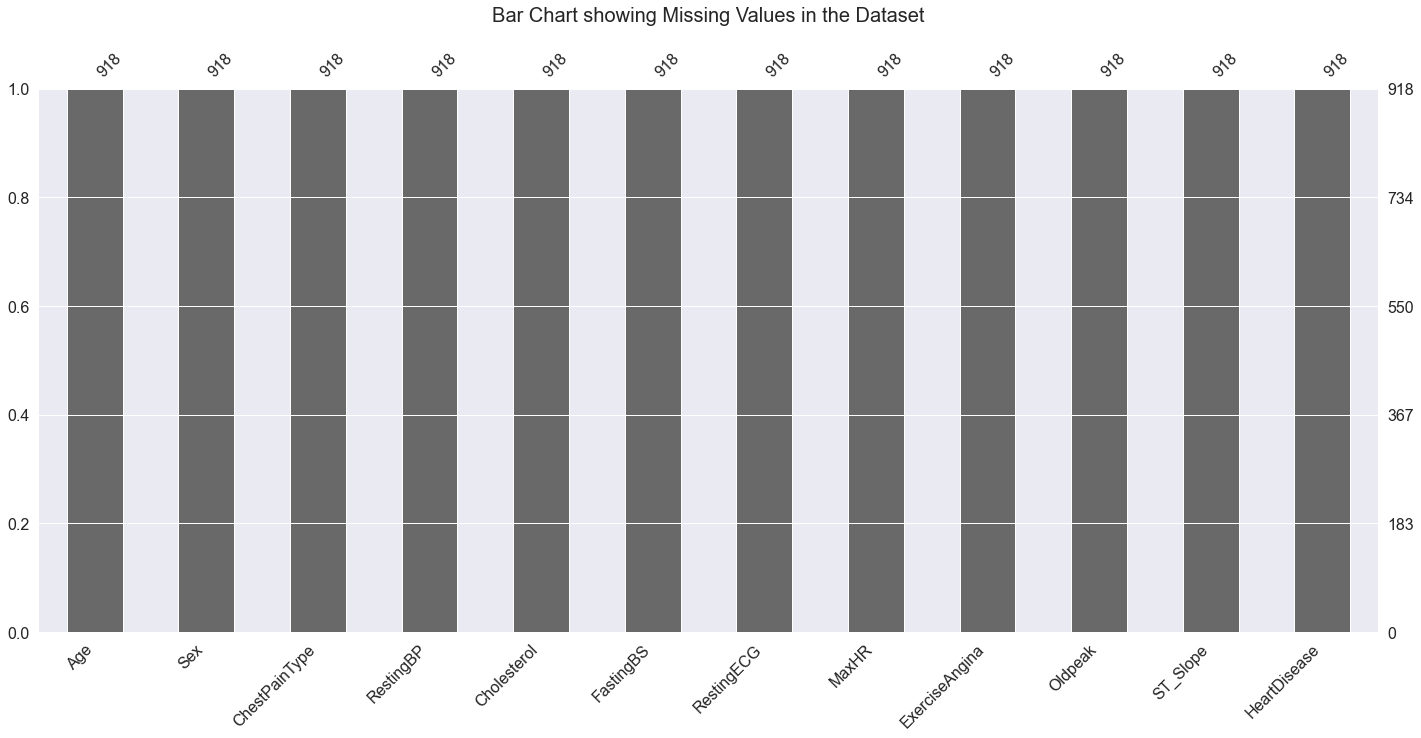

In [60]:
plt.title("Bar Chart showing Missing Values in the Dataset\n", fontsize = (20))
msno.bar(df)

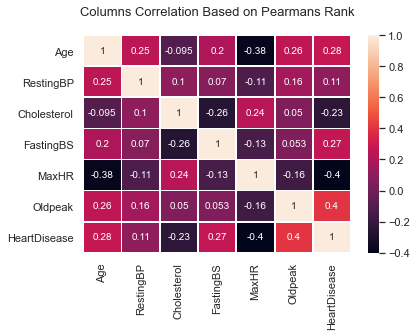

In [61]:
plt.title("Columns Correlation Based on Pearmans Rank\n", fontsize = (13))
sb.heatmap(df.corr(), annot = True, linewidths=0.8)

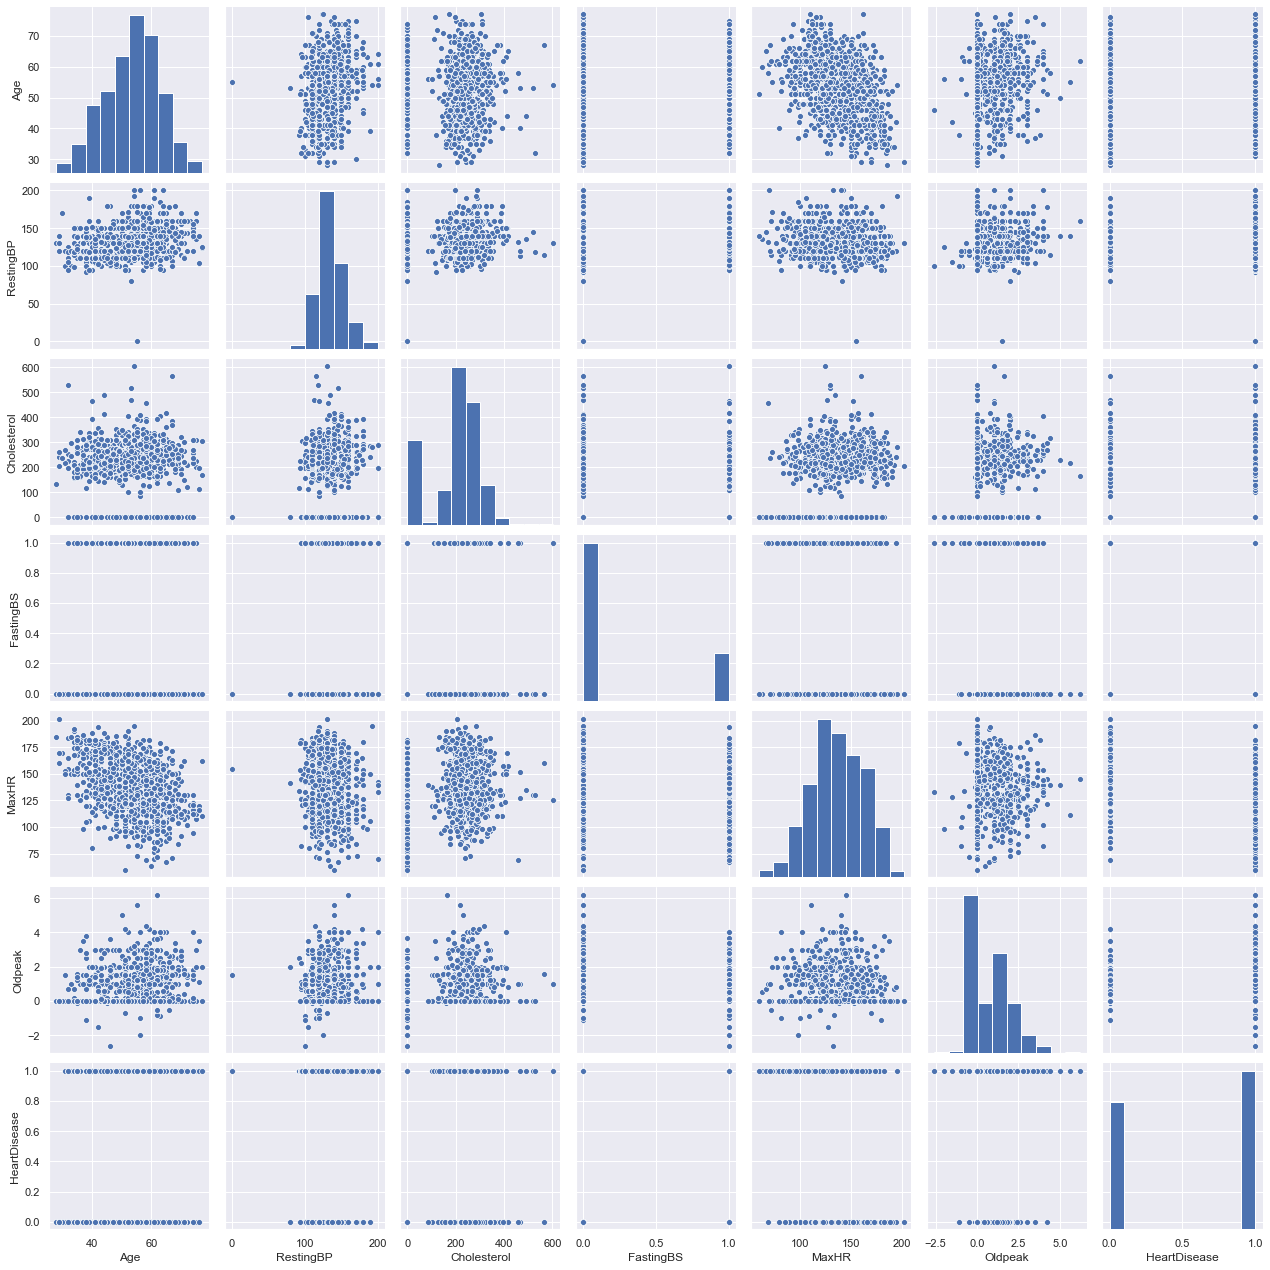

In [62]:
sb.pairplot(df)

In [74]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [76]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [77]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [78]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

### Feature Engineering

In [95]:
x = df.drop(columns = ["HeartDisease"]) # Predictor
y = df["HeartDisease"]  # Target


le = LabelEncoder()

x = x.apply(le.fit_transform)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

print("x train ", x_train.shape)
print("x test ", x_test.shape)
print("y train ", y_train.shape)
print("y test ", y_test.shape)

x train  (688, 11)
x test  (230, 11)
y train  (688,)
y test  (230,)


#### create a model to train the predictor

In [105]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train, y_train)

pred = dtc.predict(x_train)
print("Predictions outcomes : \n", pred)

score = dtc.score(x_train, pred)
print('Accuracy Score: ', score)


Predictions outcomes : 
 [1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0
 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1
 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0
 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0
 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0
 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0
 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0
 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1
 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0
 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0
